<a href="https://colab.research.google.com/github/Aleena24/AML_lab/blob/main/2348503_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic Dataset

In [1]:
from sklearn.datasets import make_blobs
X,y= make_blobs(n_samples = 750, n_features = 2, center_box = (0.0, 24.0),random_state = 0)

# dataset displayed

In [2]:
print("The dataset has {} samples and {} features.".format(X.shape[0], X.shape[1]))
print("first 10 rows of the dataset:")
print(X[:10])

The dataset has 750 samples and 2 features.
first 10 rows of the dataset:
[[15.23901586 11.4155981 ]
 [13.03864352 16.86675391]
 [13.43367792 12.64044805]
 [14.26792213 13.17138869]
 [ 9.76615764 15.03298267]
 [ 8.33768663 14.80562359]
 [13.04141714 17.25849802]
 [11.4652539  19.11532019]
 [10.59029556 16.04893929]
 [ 9.16738484 17.17544442]]


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


# K_means Algorithm

In [4]:
cluster_range = range(2, 10)
for n_clusters in cluster_range:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

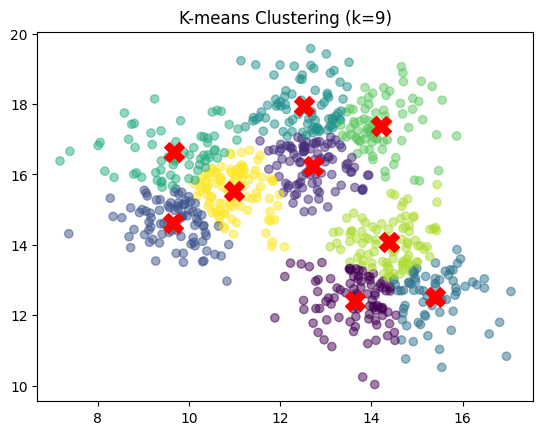

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title(f'K-means Clustering (k={n_clusters})')
plt.show()

In [6]:
print(f"Number of samples in each cluster (k={n_clusters}):")
print(pd.Series(kmeans.labels_).value_counts())

Number of samples in each cluster (k=9):
8    100
7     92
1     91
0     91
2     85
4     80
6     78
3     69
5     64
dtype: int64


# Sum of Squared Distance

In [7]:
kmeans_sse = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    kmeans_sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

# Visualization of SSE

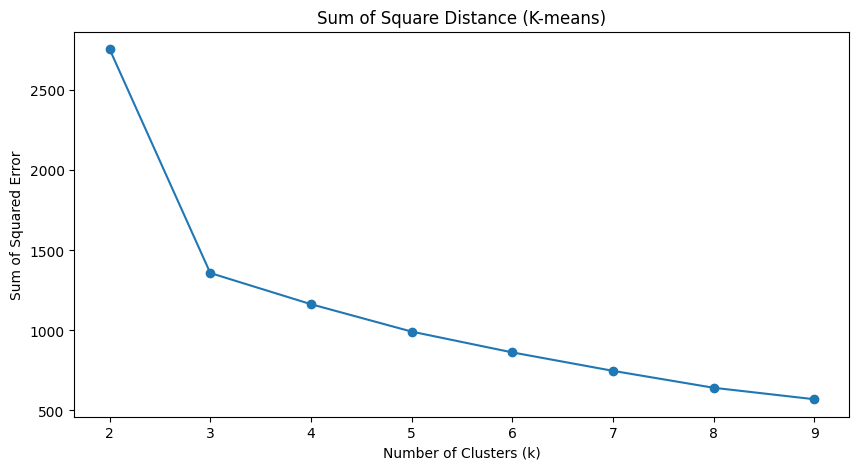

Sum of Squared Error for k=9: 570.1669381461493


In [18]:
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, kmeans_sse, marker='o')
plt.title('Sum of Square Distance (K-means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error')
plt.show()
print(f"Sum of Squared Error for k={n_clusters}: {kmeans_sse[-1]}")

# Silhouette_scores

In [9]:
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

# Visualization of Silhouette Score

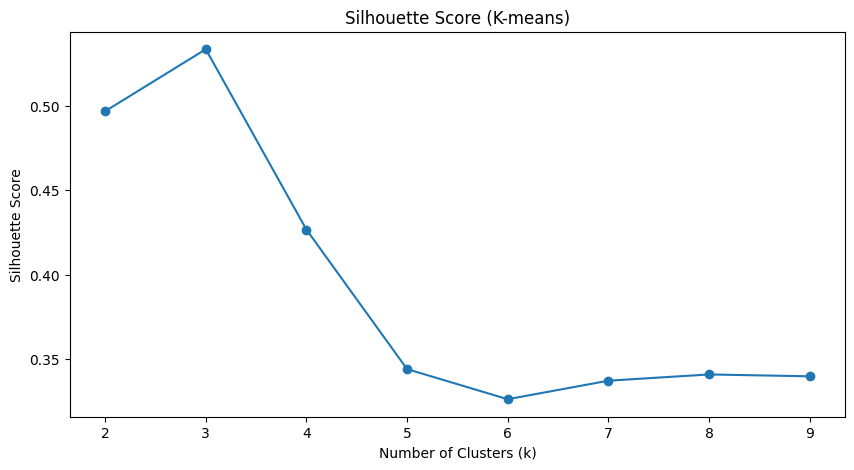

Silhouette score for k=9: 0.339968864690617


In [19]:
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score (K-means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()
print(f"Silhouette score for k={n_clusters}: {silhouette_avg}")

# Hierarchical Clustering

In [16]:
linkage_methods = ['ward','complete', 'average']
for linkage_method in linkage_methods:
  linkage_matrix = linkage(X, method = linkage_method)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [50.0, 50.0, 72.5, 72.5],
  [20.0, 20.0, 61.25, 61.25],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [195.0, 195.0, 205.0, 205.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [200.0, 200.0, 223.75, 223.75],
  [161.25, 161.25, 211.875, 211.875],
  [111.25, 111.25, 186.5625, 186.5625],
  [40.625, 40.625, 148.90625, 148.90625],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [305

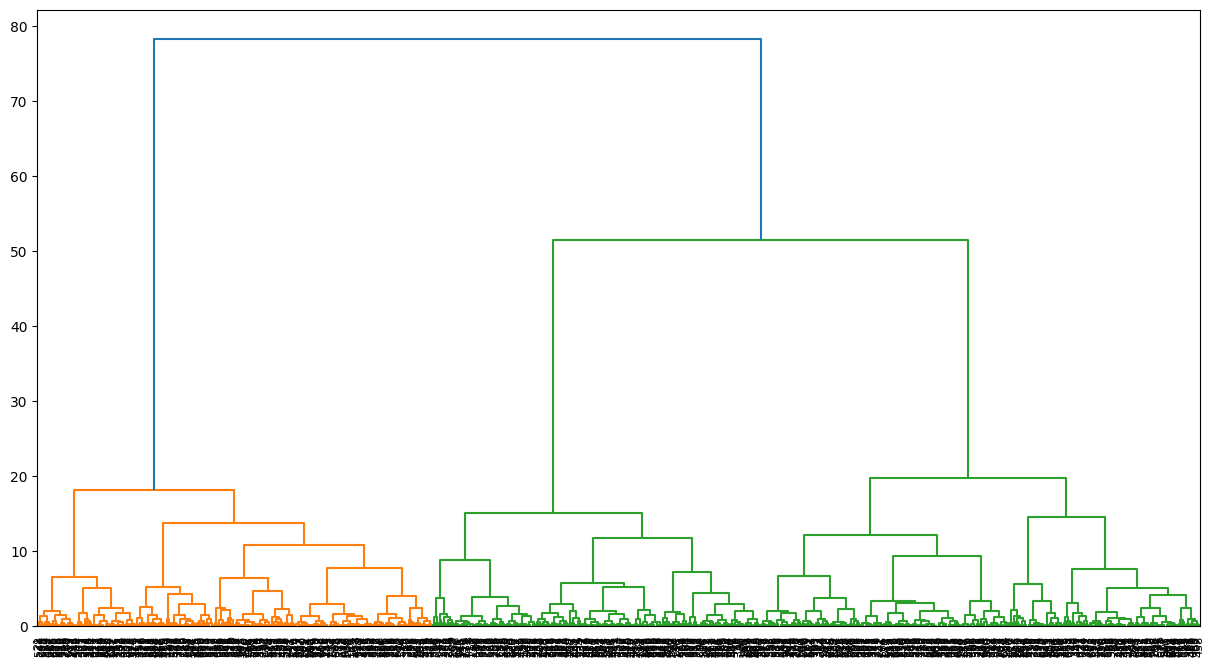

In [12]:
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, p=30, truncate_mode='level', leaf_rotation=90., leaf_font_size=8., show_contracted=True)